In [58]:
import gymnasium as gym

In [59]:
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
import torch
import torch.nn as nn

In [60]:
class MinigridFeaturesExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space: gym.Space, features_dim: int = 512, normalized_image: bool = False) -> None:
        super().__init__(observation_space, features_dim)
        n_input_channels = observation_space.shape[0]
        self.cnn = nn.Sequential(
            nn.Conv2d(n_input_channels, 16, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(16, 32, (2, 2)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (2, 2)),
            nn.ReLU(),
            nn.Flatten(),
        )

        # Compute shape by doing one forward pass
        with torch.no_grad():
            n_flatten = self.cnn(torch.as_tensor(observation_space.sample()[None]).float()).shape[1]

        self.linear = nn.Sequential(nn.Linear(n_flatten, features_dim), nn.ReLU())

    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        return self.linear(self.cnn(observations))

In [61]:
import minigrid
from minigrid.wrappers import ImgObsWrapper, FullyObsWrapper
from stable_baselines3 import PPO

policy_kwargs = dict(
    features_extractor_class=MinigridFeaturesExtractor,
    features_extractor_kwargs=dict(features_dim=128),
)


In [62]:
env = gym.make("MiniGrid-SimpleCrossingS9N3-v0", render_mode="rgb_array")
env = FullyObsWrapper(env)

/Users/jseely/miniconda3/envs/myenv2/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.width to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.width` for environment variables or `env.get_wrapper_attr('width')` that will search the reminding wrappers.
  logger.warn(
/Users/jseely/miniconda3/envs/myenv2/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.height to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.height` for environment variables or `env.get_wrapper_attr('height')` that will search the reminding wrappers.
  logger.warn(


In [116]:
obs, _ = env.reset()

In [126]:
env.observation_space

Dict('direction': Discrete(4), 'image': Box(0, 255, (9, 9, 3), uint8), 'mission': MissionSpace(<function CrossingEnv._gen_mission at 0x125a3ce00>, None))

In [ ]:
model = PPO("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)

In [27]:
model = PPO("", env, policy_kwargs=policy_kwargs, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/Users/jseely/miniconda3/envs/myenv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
model.learn(2e5)


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 324      |
|    ep_rew_mean     | 0        |
| time/              |          |
|    fps             | 1610     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 324         |
|    ep_rew_mean          | 0           |
| time/                   |             |
|    fps                  | 472         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016506422 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.94       |
|    explained_variance   | -3.62       |
|    learning_rate        | 0.

KeyboardInterrupt: 

In [30]:
model.policy

ActorCriticCnnPolicy(
  (features_extractor): MinigridFeaturesExtractor(
    (cnn): Sequential(
      (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
      (3): ReLU()
      (4): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=128, bias=True)
      (1): ReLU()
    )
  )
  (pi_features_extractor): MinigridFeaturesExtractor(
    (cnn): Sequential(
      (0): Conv2d(3, 16, kernel_size=(2, 2), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
      (3): ReLU()
      (4): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=1024, out_features=128, bias=True)
      (1): ReLU()
    )
  )
  (vf_features_ex

In [34]:
import matplotlib.pyplot as plt

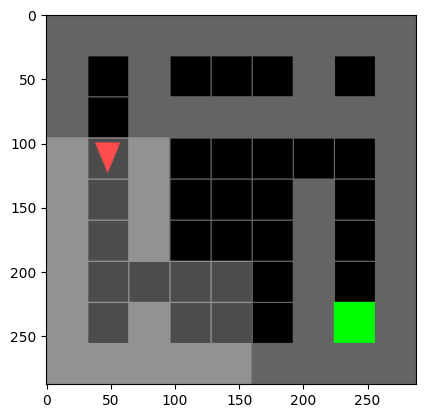

In [36]:
plt.imshow(env.render())